# Exploring organism occurrence data from GBIF 
All data was obtained through the GBIF API. See file `gbif_querying.ipynb` for more details.

In [1]:
# module importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


# establishing custom heatmap setup
import matplotlib as mpl 
import matplotlib.colors as colors

heat = mpl.colormaps['Spectral_r']
heat.set_extremes(bad='dimgray', under='dimgray', over='lightgray')

def make_norm(matrix):
    return colors.SymLogNorm(matrix.unstack().abs().median(),
                             base=2,vmin=-0.99999,vmax=0.99999)

Importing all API-pulled CSV files as dataframes. 

Choosing to import all as `dtype=object` for error-related reasons; will manually handle dtypes. 

In [2]:
s_ottr_df_raw = pd.read_csv("s_ottr_df_raw.csv", dtype=object)
n_ottr_df_raw = pd.read_csv("n_ottr_df_raw.csv", dtype=object)
g_kelp_df_raw = pd.read_csv("g_kelp_df_raw.csv", dtype=object)
b_kelp_df_raw = pd.read_csv("b_kelp_df_raw.csv", dtype=object)
e_grss_df_raw = pd.read_csv("g_kelp_df_raw.csv", dtype=object)
p_urch_df_raw = pd.read_csv("p_urch_df_raw.csv", dtype=object)
s_crab_df_raw = pd.read_csv("s_crab_df_raw.csv", dtype=object)
w_shrk_df_raw = pd.read_csv("w_shrk_df_raw.csv", dtype=object)

In [3]:
all_df_raw_dict = {'s_ottr': s_ottr_df_raw, 
                   'n_ottr': n_ottr_df_raw, 
                   'g_kelp': g_kelp_df_raw, 
                   'b_kelp': b_kelp_df_raw, 
                   'e_grss': e_grss_df_raw, 
                   'p_urch': p_urch_df_raw, 
                   's_crab': s_crab_df_raw,
                   'w_shrk': w_shrk_df_raw}

Creating dataframes of all species dataframes combined; both inner-join and outer-join. Then exploring null values. I'm using dictionary comprehension because base Python data structures display more entries than Pandas data structures – in other words, I can't see all of the columns when displayed in a Series.

In [4]:
all_inner_df_raw = pd.concat(all_df_raw_dict.values(),join='inner')
all_outer_df_raw = pd.concat(all_df_raw_dict.values(),join='outer')

In [5]:
{x:all_inner_df_raw[x].notna().sum() for x in all_inner_df_raw}

{'Unnamed: 0': 31256,
 'key': 31256,
 'datasetKey': 31256,
 'publishingOrgKey': 31256,
 'installationKey': 31256,
 'hostingOrganizationKey': 31256,
 'publishingCountry': 31256,
 'protocol': 31256,
 'lastCrawled': 31256,
 'lastParsed': 31256,
 'crawlId': 31256,
 'extensions': 31256,
 'basisOfRecord': 31256,
 'occurrenceStatus': 31256,
 'sex': 2964,
 'lifeStage': 2883,
 'taxonKey': 31256,
 'kingdomKey': 31256,
 'phylumKey': 31256,
 'classKey': 31256,
 'orderKey': 31256,
 'familyKey': 31256,
 'genusKey': 31256,
 'speciesKey': 31243,
 'acceptedTaxonKey': 31256,
 'scientificName': 31256,
 'acceptedScientificName': 31256,
 'kingdom': 31256,
 'phylum': 31256,
 'order': 31256,
 'family': 31256,
 'genus': 31256,
 'species': 31243,
 'genericName': 31256,
 'specificEpithet': 31192,
 'infraspecificEpithet': 5804,
 'taxonRank': 31256,
 'taxonomicStatus': 31256,
 'dateIdentified': 27453,
 'decimalLatitude': 29722,
 'decimalLongitude': 29722,
 'coordinateUncertaintyInMeters': 22788,
 'stateProvince':

In [6]:
{x:all_outer_df_raw.columns[x] for x in range(len(all_outer_df_raw.columns))}

{0: 'Unnamed: 0',
 1: 'key',
 2: 'datasetKey',
 3: 'publishingOrgKey',
 4: 'installationKey',
 5: 'hostingOrganizationKey',
 6: 'publishingCountry',
 7: 'protocol',
 8: 'lastCrawled',
 9: 'lastParsed',
 10: 'crawlId',
 11: 'extensions',
 12: 'basisOfRecord',
 13: 'occurrenceStatus',
 14: 'sex',
 15: 'lifeStage',
 16: 'taxonKey',
 17: 'kingdomKey',
 18: 'phylumKey',
 19: 'classKey',
 20: 'orderKey',
 21: 'familyKey',
 22: 'genusKey',
 23: 'speciesKey',
 24: 'acceptedTaxonKey',
 25: 'scientificName',
 26: 'acceptedScientificName',
 27: 'kingdom',
 28: 'phylum',
 29: 'order',
 30: 'family',
 31: 'genus',
 32: 'species',
 33: 'genericName',
 34: 'specificEpithet',
 35: 'infraspecificEpithet',
 36: 'taxonRank',
 37: 'taxonomicStatus',
 38: 'dateIdentified',
 39: 'decimalLatitude',
 40: 'decimalLongitude',
 41: 'coordinateUncertaintyInMeters',
 42: 'stateProvince',
 43: 'gadm',
 44: 'year',
 45: 'month',
 46: 'day',
 47: 'eventDate',
 48: 'startDayOfYear',
 49: 'endDayOfYear',
 50: 'issues',

In [7]:
{x:all_inner_df_raw.columns[x] for x in range(len(all_inner_df_raw.columns))}

{0: 'Unnamed: 0',
 1: 'key',
 2: 'datasetKey',
 3: 'publishingOrgKey',
 4: 'installationKey',
 5: 'hostingOrganizationKey',
 6: 'publishingCountry',
 7: 'protocol',
 8: 'lastCrawled',
 9: 'lastParsed',
 10: 'crawlId',
 11: 'extensions',
 12: 'basisOfRecord',
 13: 'occurrenceStatus',
 14: 'sex',
 15: 'lifeStage',
 16: 'taxonKey',
 17: 'kingdomKey',
 18: 'phylumKey',
 19: 'classKey',
 20: 'orderKey',
 21: 'familyKey',
 22: 'genusKey',
 23: 'speciesKey',
 24: 'acceptedTaxonKey',
 25: 'scientificName',
 26: 'acceptedScientificName',
 27: 'kingdom',
 28: 'phylum',
 29: 'order',
 30: 'family',
 31: 'genus',
 32: 'species',
 33: 'genericName',
 34: 'specificEpithet',
 35: 'infraspecificEpithet',
 36: 'taxonRank',
 37: 'taxonomicStatus',
 38: 'dateIdentified',
 39: 'decimalLatitude',
 40: 'decimalLongitude',
 41: 'coordinateUncertaintyInMeters',
 42: 'stateProvince',
 43: 'gadm',
 44: 'year',
 45: 'month',
 46: 'day',
 47: 'eventDate',
 48: 'startDayOfYear',
 49: 'endDayOfYear',
 50: 'issues',

Picking a selection of columns to create a more refined DataFrame.

In [28]:
barely_cleaned_all_df = all_inner_df_raw.iloc[:,[1,16,25,31,32,38,39,40,13,14,15,41,42,43,44,45,46,47,50,61,79,80,81,90]].copy()
barely_cleaned_all_df.reset_index(drop=True,inplace=True)

In [29]:
barely_cleaned_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31256 entries, 0 to 31255
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   key                            31256 non-null  object
 1   taxonKey                       31256 non-null  object
 2   scientificName                 31256 non-null  object
 3   genus                          31256 non-null  object
 4   species                        31243 non-null  object
 5   dateIdentified                 27453 non-null  object
 6   decimalLatitude                29722 non-null  object
 7   decimalLongitude               29722 non-null  object
 8   occurrenceStatus               31256 non-null  object
 9   sex                            2964 non-null   object
 10  lifeStage                      2883 non-null   object
 11  coordinateUncertaintyInMeters  22788 non-null  object
 12  stateProvince                  31256 non-null  object
 13  g

Here, I start to convert data types and handle data entries with peculiarities (such as: observations far outside the state of California, observations with seemingly erroneous names, etc.)

In [30]:
barely_cleaned_all_df.loc[:,'decimalLatitude'] = barely_cleaned_all_df.decimalLatitude.astype(float)
barely_cleaned_all_df.loc[:,'decimalLongitude'] = barely_cleaned_all_df.decimalLongitude.astype(float)

In [31]:
sorted(set([x for x in barely_cleaned_all_df.scientificName]))

['BOLD:AAA9092',
 'BOLD:AAD8117',
 'BOLD:ACI1743',
 'Carcharodon carcharias (Linnaeus, 1758)',
 'Carcharodon sulcidens (Agassiz, 1835)',
 'Echinus purpuratus Stimpson, 1857',
 'Enhydra lutris nereis (Merriam, 1904)',
 'Nereocystis Postels & Ruprecht, 1840',
 'Nereocystis luetkeana (K.Mertens) Postels & Ruprecht',
 'Pachygrapsus crassipes Randall, 1840',
 'Strongylocentrotus purpuratus (Stimpson, 1857)',
 'Zostera latifolia Morong',
 'Zostera marina L.',
 'Zostera marina f. sulcatifolia Setch.',
 'Zostera marina f. typica Setch.',
 'Zostera marina var. latifolia Gray',
 'Zostera marina var. latifolia Morong',
 'Zostera marina var. stenophylla (Raf.) Asch. & Graebn.',
 'Zostera pacifica S.Watson']

In [32]:
barely_cleaned_all_df.drop(
        barely_cleaned_all_df.loc[[True if re.match("BOLD",x) else False 
                                for x in barely_cleaned_all_df.scientificName]].index, inplace=True)

In [33]:
latbool_series = barely_cleaned_all_df['decimalLatitude'] > 30
lonbool_series = barely_cleaned_all_df['decimalLongitude'] < -111
# multiplying the two creates a boolean Series mask to drop rows outside the geographic range
barely_cleaned_all_df.drop( 
    barely_cleaned_all_df[latbool_series * lonbool_series].index, inplace=False)

,key,taxonKey,scientificName,genus,species,dateIdentified,decimalLatitude,decimalLongitude,occurrenceStatus,sex,...,year,month,day,eventDate,issues,datasetName,gbifID,occurrenceID,taxonID,higherGeography
1542,4101665331,6163936,"Enhydra lutris nereis (Merriam, 1904)",Enhydra,Enhydra lutris,2019-07-07T00:00:00,NaN,NaN,PRESENT,FEMALE,...,2019.0,7.0,7.0,2019-07-07,[],NaN,4101665331,urn:catalog:CAS:MAM:35906,NaN,"North America, USA, California, Ventura Co."
3225,1500375422,6163936,"Enhydra lutris nereis (Merriam, 1904)",Enhydra,Enhydra lutris,2013-03-03T00:00:00,36.605,-21.884,PRESENT,FEMALE,...,2013.0,3.0,3.0,2013-03-03,"['COUNTRY_COORDINATE_MISMATCH', 'CONTINENT_COO...",NaN,1500375422,urn:catalog:CAS:MAM:31813,NaN,"North America, USA, California, Monterey Co."
3837,1065084196,6163936,"Enhydra lutris nereis (Merriam, 1904)",Enhydra,Enhydra lutris,NaN,NaN,NaN,PRESENT,MALE,...,2009.0,10.0,27.0,2009-10-27,"['INSTITUTION_MATCH_FUZZY', 'COLLECTION_MATCH_...",NaN,1065084196,urn:catalog:CSUC:Mammals:5272,NaN,USA|CA|San Luis Obispo
3904,1899532188,6163936,"Enhydra lutris nereis (Merriam, 1904)",Enhydra,Enhydra lutris,NaN,NaN,NaN,PRESENT,NaN,...,2008.0,NaN,NaN,2008,"['RECORDED_DATE_INVALID', 'TAXON_MATCH_SCIENTI...",NatureServe Network Species Occurrence Data,1899532188,2-1563898-271,NaN,NaN
4011,583443864,6163936,"Enhydra lutris nereis (Merriam, 1904)",Enhydra,Enhydra lutris,NaN,NaN,NaN,PRESENT,FEMALE,...,2006.0,2.0,15.0,2006-02-15,[],NaN,583443864,urn:catalog:CAS:MAM:28333,NaN,"North America, USA, California, San Luis Obisp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31251,787105376,2420694,"Carcharodon carcharias (Linnaeus, 1758)",Carcharodon,Carcharodon carcharias,NaN,NaN,NaN,PRESENT,NaN,...,NaN,NaN,NaN,NaN,"['INSTITUTION_MATCH_FUZZY', 'COLLECTION_MATCH_...",NaN,787105376,urn:catalog:UCMP:V:88609,NaN,NaN
31252,787105377,2420694,"Carcharodon carcharias (Linnaeus, 1758)",Carcharodon,Carcharodon carcharias,NaN,NaN,NaN,PRESENT,NaN,...,NaN,NaN,NaN,NaN,['OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_C...,NaN,787105377,urn:catalog:UCMP:V:88610,NaN,NaN
31253,787105757,2420694,"Carcharodon carcharias (Linnaeus, 1758)",Carcharodon,Carcharodon carcharias,NaN,NaN,NaN,PRESENT,NaN,...,NaN,NaN,NaN,NaN,['OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_C...,NaN,787105757,urn:catalog:UCMP:V:88701,NaN,NaN
31254,787105758,2420694,"Carcharodon carcharias (Linnaeus, 1758)",Carcharodon,Carcharodon carcharias,NaN,NaN,NaN,PRESENT,NaN,...,NaN,NaN,NaN,NaN,['OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_C...,NaN,787105758,urn:catalog:UCMP:V:88702,NaN,NaN


creating a subset of the data for easier graphing

In [25]:
subset_all_df = barely_cleaned_all_df.sample(n=10000)

In [26]:
subset_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3925 to 16362
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   key                            10000 non-null  object
 1   taxonKey                       10000 non-null  object
 2   scientificName                 10000 non-null  object
 3   genus                          10000 non-null  object
 4   species                        9995 non-null   object
 5   dateIdentified                 8807 non-null   object
 6   decimalLatitude                9523 non-null   object
 7   decimalLongitude               9523 non-null   object
 8   occurrenceStatus               10000 non-null  object
 9   sex                            903 non-null    object
 10  lifeStage                      876 non-null    object
 11  coordinateUncertaintyInMeters  7366 non-null   object
 12  stateProvince                  10000 non-null  object
 13  gad

<Axes: xlabel='decimalLongitude', ylabel='decimalLatitude'>

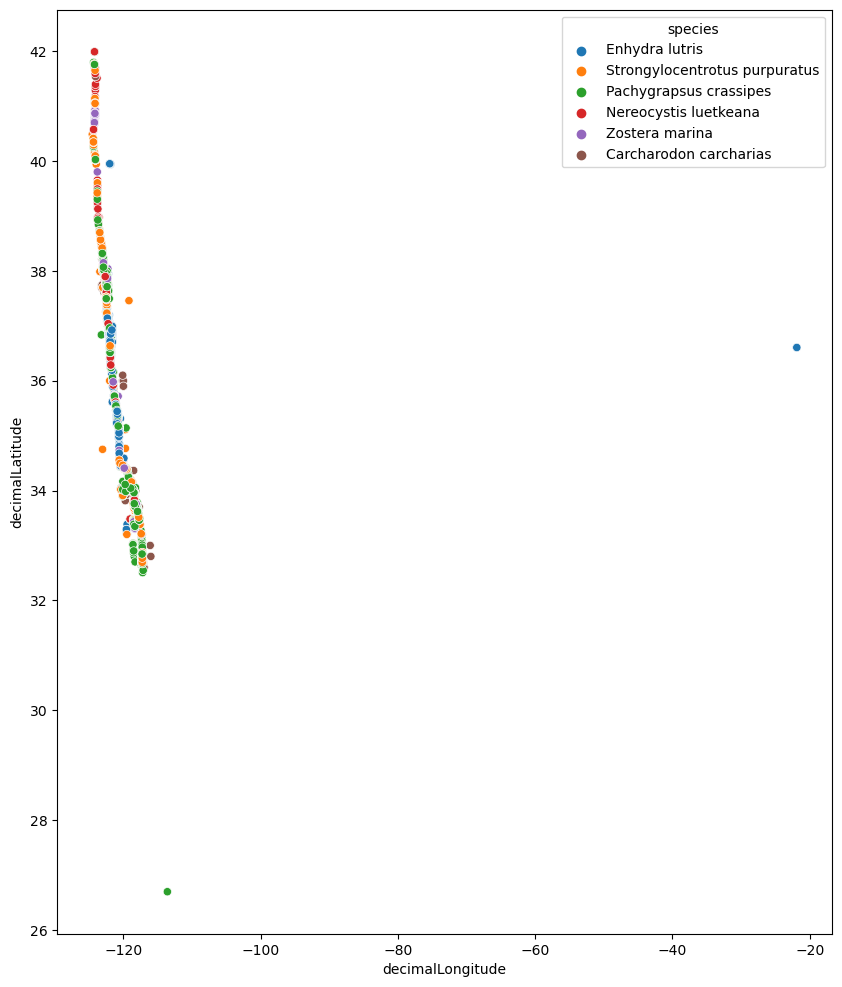

In [27]:
plt.figure(figsize=(10,12))
sns.scatterplot(subset_all_df,x='decimalLongitude',y='decimalLatitude',hue='species')

minimum 30 maximum 42
minimum 126 maximum 116 


In [22]:
all_outer_df_raw = pd.concat(all_df_raw_dict.values(),join='outer')

In [23]:
all_outer_df_raw.loc[:,'decimalLatitude'] = all_outer_df_raw.decimalLatitude.astype(float)
all_outer_df_raw.loc[:,'decimalLongitude'] = all_outer_df_raw.decimalLongitude.astype(float)

In [24]:
w_shrk_df_raw.dropna(axis=1,thresh=170).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 96 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     406 non-null    object
 1   key                            406 non-null    object
 2   datasetKey                     406 non-null    object
 3   publishingOrgKey               406 non-null    object
 4   installationKey                406 non-null    object
 5   hostingOrganizationKey         406 non-null    object
 6   publishingCountry              406 non-null    object
 7   protocol                       406 non-null    object
 8   lastCrawled                    406 non-null    object
 9   lastParsed                     406 non-null    object
 10  crawlId                        406 non-null    object
 11  extensions                     406 non-null    object
 12  basisOfRecord                  406 non-null    object
 13  occur

In [25]:
all_outer_df_raw[all_outer_df_raw.decimalLongitude > -116].index

Index([3225, 4394, 4427, 13197, 13210], dtype='int64')

In [26]:
all_outer_df_raw.drop(index = all_outer_df_raw[all_outer_df_raw.decimalLatitude < 30].index, inplace=True)
all_outer_df_raw.drop(index = all_outer_df_raw[all_outer_df_raw.decimalLongitude > -116].index, inplace=True)

In [27]:
all_outer_df_raw

,Unnamed: 0,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,...,originalNameUsage,parentNameUsage,group,organismRemarks,earliestEonOrLowestEonothem,latestEonOrHighestEonothem,latestEraOrHighestErathem,geologicalContextID,bed,lithostratigraphicTerms
0,0,4510421312,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T13:38:05.352+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4510406828,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T14:26:38.137+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4510385836,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T14:27:04.535+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4510142854,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T14:27:14.665+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4510176891,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T13:37:26.478+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,101,787105376,58d0f326-2e85-4d0a-a744-571461220f00,0dc9c7a0-b5c6-11d9-a0b8-b8a03c50a862,92d2fa2a-f305-4bb1-9fe6-fa762d6ebb69,0dc9c7a0-b5c6-11d9-a0b8-b8a03c50a862,US,EML,2024-04-15T11:31:38.974+00:00,2024-04-15T11:39:07.304+00:00,...,NaN,NaN,NaN,NaN,Cenozoic,Cenozoic,Cenozoic,V68106,NaN,NaN
402,102,787105377,58d0f326-2e85-4d0a-a744-571461220f00,0dc9c7a0-b5c6-11d9-a0b8-b8a03c50a862,92d2fa2a-f305-4bb1-9fe6-fa762d6ebb69,0dc9c7a0-b5c6-11d9-a0b8-b8a03c50a862,US,EML,2024-04-15T11:31:38.974+00:00,2024-04-15T11:39:07.263+00:00,...,NaN,NaN,NaN,NaN,Cenozoic,Cenozoic,Cenozoic,V68106,NaN,NaN
403,103,787105757,58d0f326-2e85-4d0a-a744-571461220f00,0dc9c7a0-b5c6-11d9-a0b8-b8a03c50a862,92d2fa2a-f305-4bb1-9fe6-fa762d6ebb69,0dc9c7a0-b5c6-11d9-a0b8-b8a03c50a862,US,EML,2024-04-15T11:31:38.974+00:00,2024-04-15T11:39:07.440+00:00,...,NaN,NaN,NaN,NaN,Cenozoic,Cenozoic,Cenozoic,V68147,NaN,NaN
404,104,787105758,58d0f326-2e85-4d0a-a744-571461220f00,0dc9c7a0-b5c6-11d9-a0b8-b8a03c50a862,92d2fa2a-f305-4bb1-9fe6-fa762d6ebb69,0dc9c7a0-b5c6-11d9-a0b8-b8a03c50a862,US,EML,2024-04-15T11:31:38.974+00:00,2024-04-15T11:39:07.297+00:00,...,NaN,NaN,NaN,NaN,Cenozoic,Cenozoic,Cenozoic,V68147,NaN,NaN


In [28]:
all_outer_df_raw.datasetName

0      iNaturalist research-grade observations
1      iNaturalist research-grade observations
2      iNaturalist research-grade observations
3      iNaturalist research-grade observations
4      iNaturalist research-grade observations
                        ...                   
401                                        NaN
402                                        NaN
403                                        NaN
404                                        NaN
405                                        NaN
Name: datasetName, Length: 31244, dtype: object

In [28]:
s_ottr_df_raw.groupby('datasetName')

<Axes: xlabel='decimalLongitude', ylabel='decimalLatitude'>

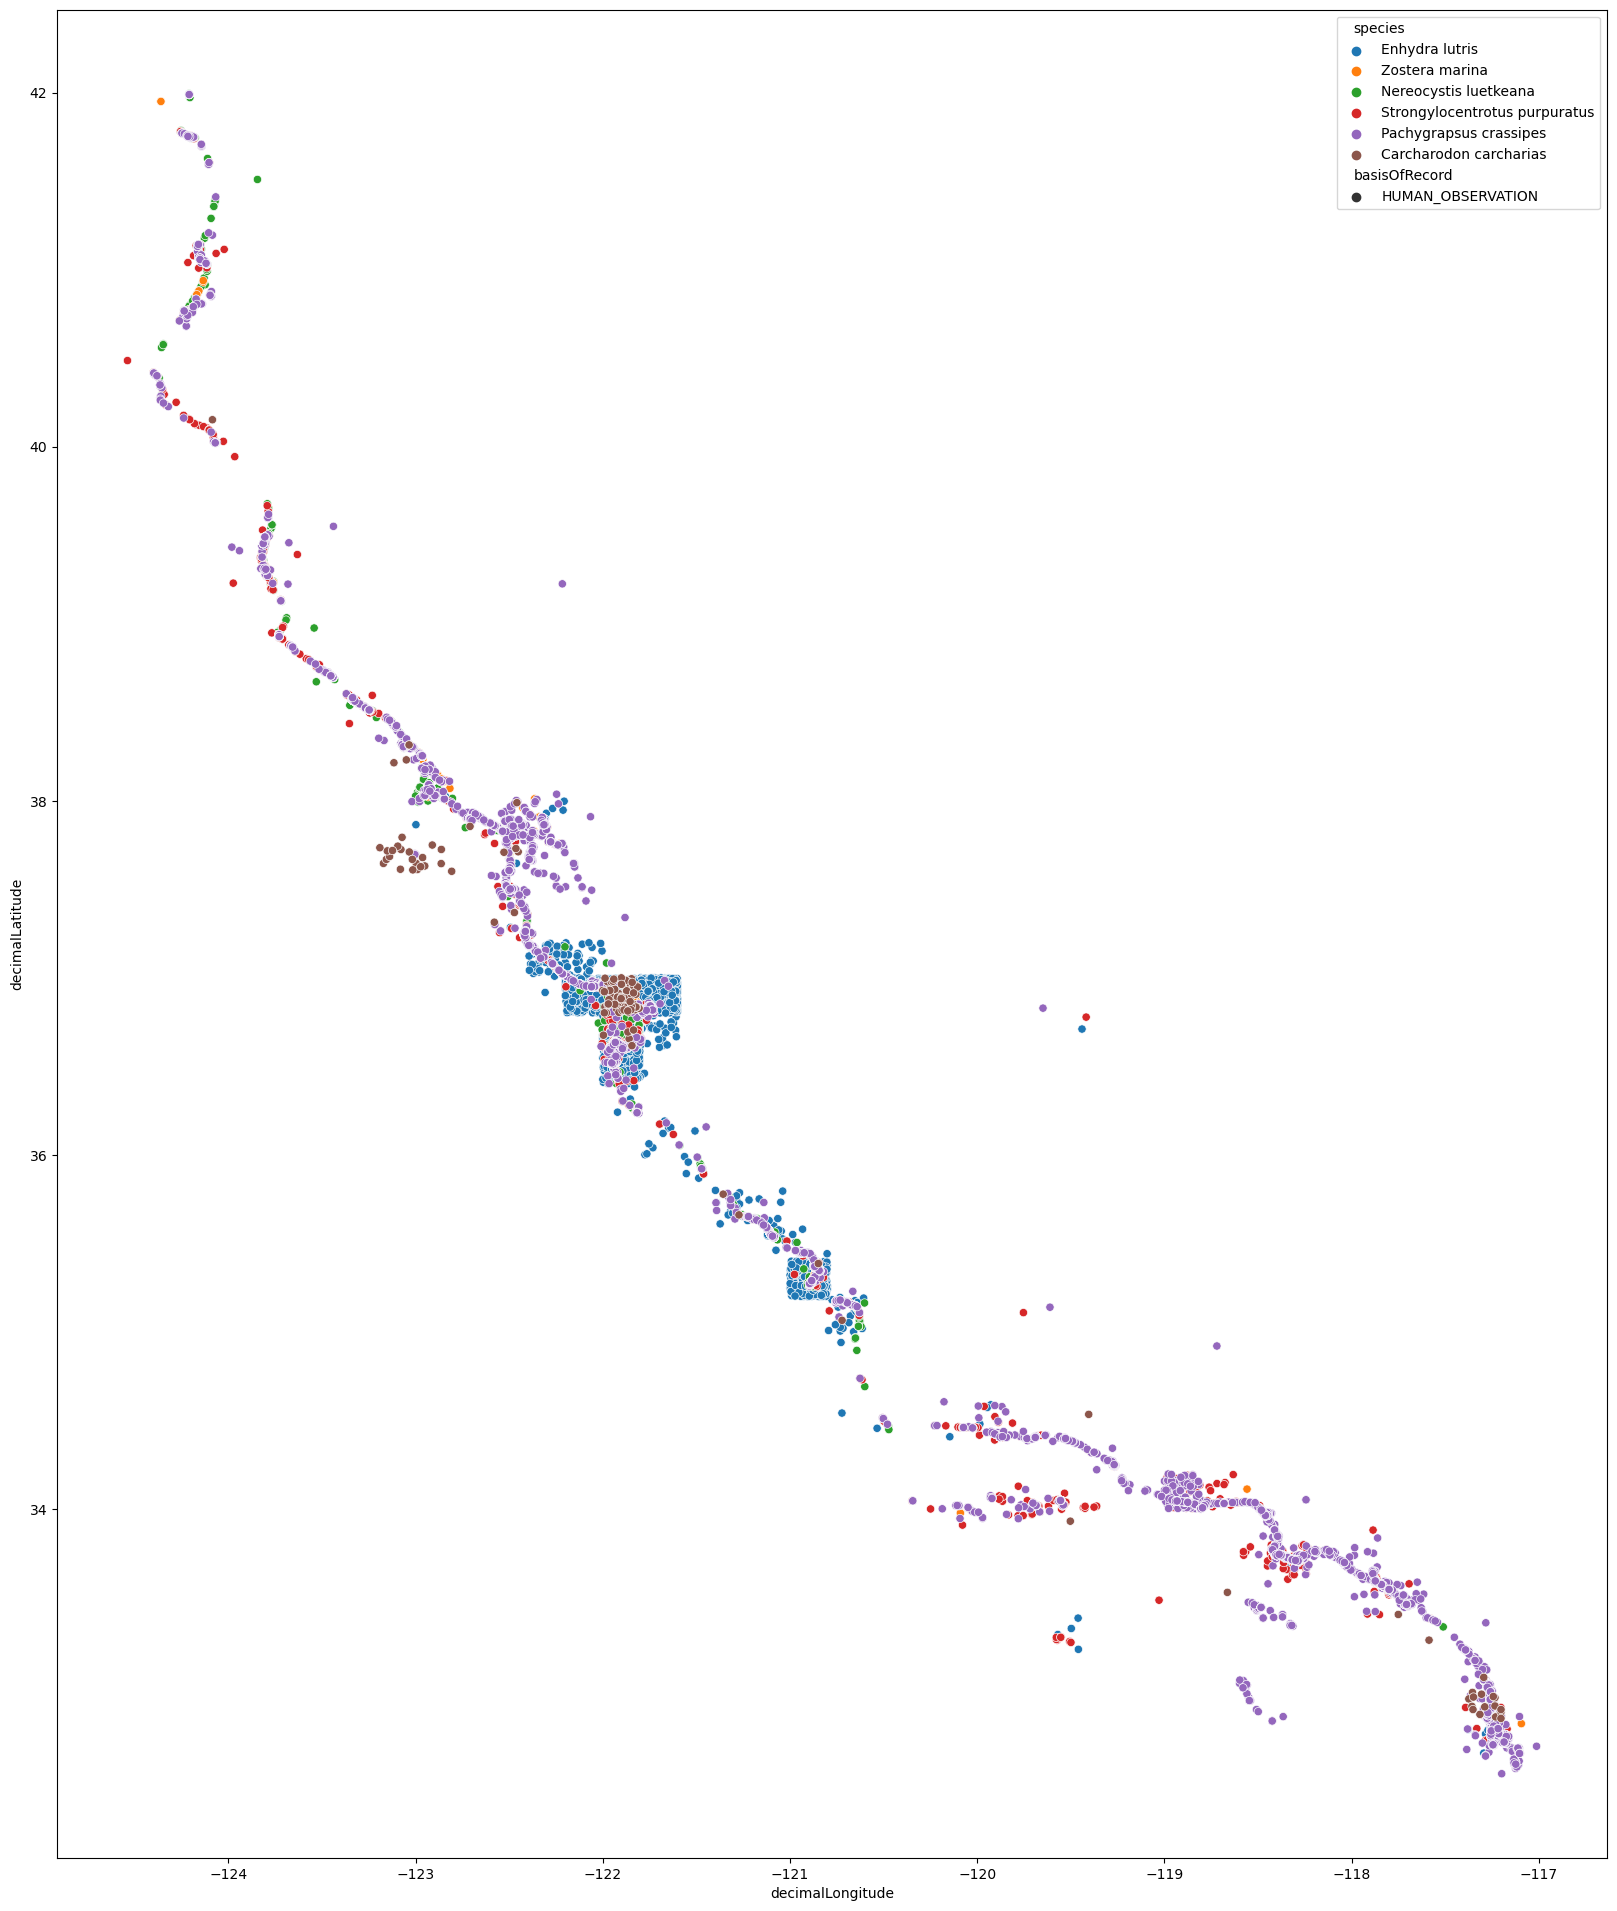

In [30]:
plt.figure(figsize=(20,24))
sns.scatterplot(all_outer_df_raw[all_outer_df_raw.datasetName == 'iNaturalist research-grade observations'],
                x='decimalLongitude',
                y='decimalLatitude',
                hue='species',style='basisOfRecord',
                )

# so inaturalist data makes a bunch of squares
specifically with otters? possibly others? BECAUSE: otters are endangered, and inaturalist obfuscates the location of endangered organisms, specifically by randomizing the provided location within a certain 'block'. 